In [1]:
# Import packages
import sys 
import os
sys.path.append(os.path.abspath("D:/other_thesis/clean_sheet/codes/functions"))
import functions_time_series #import python file containing the functions
import functions_preprocessing #import python file containing the functions
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from statsmodels.tsa.seasonal import STL
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime as dt
from matplotlib.colors import TwoSlopeNorm
import time
from rasterstats import zonal_stats
from scipy.stats import pearsonr
import plotly.express as px
import rasterio.mask
from osgeo import gdal
import re
import netCDF4 as nc

In [2]:
# For updates
import importlib
importlib.reload(functions_time_series)
importlib.reload(functions_preprocessing)

<module 'functions_preprocessing' from 'D:\\other_thesis\\clean_sheet\\codes\\functions\\functions_preprocessing.py'>

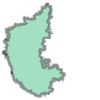

In [3]:
# Import this file to derive the polygon geometry for Karnataka
bound_Karnataka = gpd.read_file(r'C:\Users\mieke\Documents\Msc Thesis\Datasets\Shapefiles\Karnataka_state_shp\State.shp')
bound_Karnataka= bound_Karnataka.to_crs('EPSG:4326')
bound_Karnataka.geometry[0]

In [7]:
# Check the band name for SIF
fn = 'C:/Users/mieke/Documents/Data_download/Other/SIF/original_nc/sif_ann_201409a.nc'
ds = nc.Dataset(fn)
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.8
    title: High‐Resolution Global Contiguous SIF from OCO‐2
    summary: This dataset provides global solar‐induced chlorophyll fluorescence (SIF) estimates at 0.05 degree spatial and 16-day temporal resolution. Data were produced by training an artificial neural network (ANN) on native Orbiting Carbon Observatory-2 (OCO-2) SIF observations against MODIS BRDF-adjusted seven-band surface reflectance datasets (MCD43A4 v006, MCD43C4 v006).
    references: Yu et al. 2019, https://doi.org/10.1029/2018GL081109
    publisher_institution: Oak Ridge National Laboratory Distributed Active Archive Center (ORNL DAAC)
    publisher_url: https://daac.ornl.gov
    publisher_email: uso@daac.ornl.gov
    dimensions(sizes): lat(3600), lon(7200)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float64 sif_ann(lat, lon), float64 crs()
    groups: 


In [ ]:
# Change SIF nc files to GeoTIFs
path = 'C:/Users/mieke/Documents/Data_download/Other/SIF/original_nc/'
file_names = os.listdir(path)
for j in file_names:
    functions_preprocessing.nc_tiff_ab(j, path, 'C:/Users/mieke/Documents/Data_download/Other/SIF/original/', 'SIF_', ':sif_ann')

## Rescale Images

In [4]:
ndv = -9999

In [5]:
# Specified values for rescaling for LAI
offset = 0
scaling = 1 / 30

In [6]:
# For each of the LAI images, we crop the Geotiff file to Leaf Area Index in Karnataka
path = 'D:/Data_download/Copernicus/LAI/original/'
folder_names = os.listdir(path)
for i in folder_names:
    file_names = os.listdir(path + i)
    for j in file_names:
        LAI_data = path + i + "/" + j
        functions_preprocessing.rescale_unstable(j, LAI_data, ndv, scaling, offset, 'D:/other_thesis/clean_sheet/Data/LAI/img_rescaled/', 'LAI_', [0,4,4,6,6,8])

In [7]:
# Specified values for rescaling for FAPAR
offset = 0
scaling = 1 / 250

In [8]:
# For each of the FAPAR images, we crop the Geotiff file to FAPAR in Karnataka
path = 'D:/Data_download/Copernicus/FAPAR/original/'
folder_names = os.listdir(path)
for i in folder_names:
    file_names = os.listdir(path + i)
    for j in file_names:
        FAPAR_data = path + i + "/" + j
        functions_preprocessing.rescale_unstable(j, FAPAR_data, ndv, scaling, offset, 'D:/other_thesis/clean_sheet/Data/FAPAR/img_rescaled/', 'FAPAR_', [0,4,4,6,6,8])

In [9]:
# Specified values for rescaling NDVI and EVI
offset = 0
scaling = 0.0001

In [10]:
# For each of the NDVI images, we crop the Geotiff file to NDVI in Karnataka
path = 'D:/Data_download/GEE/NDVI/GEE_tifs/'
file_names = os.listdir(path)
for j in file_names:
    file_path = path + j
    functions_preprocessing.rescale(j, file_path, ndv, scaling, offset, 'D:/other_thesis/clean_sheet/Data/NDVI/img_rescaled/', 'NDVI_' + j[0:4] + '-' + j[5:7] + '-' + j[8:10] + '.tif')

In [11]:
# For each of the EVI images, we crop the Geotiff file to EVI in Karnataka
path = 'D:/Data_download/GEE/EVI/GEE_tifs/'
file_names = os.listdir(path)
for j in file_names:
    file_path = path + j
    functions_preprocessing.rescale(j, file_path, ndv, scaling, offset, 'D:/other_thesis/clean_sheet/Data/EVI/img_rescaled/', 'EVI_' + j[0:4] + '-' + j[5:7] + '-' + j[8:10] + '.tif')

In [12]:
# Specified values for rescaling SSM, SUSM, Precipitation and SIF
offset = 0
scaling = 1

In [13]:
# For each of the SSM images, we crop the Geotiff file to SSM in Karnataka
path = 'D:/Data_download/GEE/SSM/GEE_tifs/'
file_names = os.listdir(path)
for j in file_names:
    file_path = path + j
    functions_preprocessing.rescale(j, file_path, ndv, scaling, offset, 'D:/other_thesis/clean_sheet/Data/SSM/img_rescaled/', 'SSM_' + j[17:21] + '-' + j[21:23] + '-' + j[23:25] + '.tif')

In [14]:
# For each of the SUSM images, we crop the Geotiff file to SUSM in Karnataka
path = 'D:/Data_download/GEE/SUSM/GEE_tifs/'
file_names = os.listdir(path)
for j in file_names:
    file_path = path + j
    functions_preprocessing.rescale(j, file_path, ndv, scaling, offset, 'D:/other_thesis/clean_sheet/Data/SUSM/img_rescaled/', 'SUSM_' + j[17:21] + '-' + j[21:23] + '-' + j[23:25] + '.tif')

In [16]:
# For each of the Precipitation images, we crop the Geotiff file to Precipitation in Karnataka
path = 'D:/Data_download/GEE/Precipitation/GEE_tifs/'
file_names = os.listdir(path)
for j in file_names:
    file_path = path + j
    functions_preprocessing.rescale(j, file_path, ndv, scaling, offset, 'D:/other_thesis/clean_sheet/Data/PCPN/img_rescaled/', 'PCPN_' + j[0:4] + '-' + j[4:6] + '-' + j[6:8] + '.tif')

In [17]:
# For each of the SIF images, we crop the Geotiff file to SIF in Karnataka
path = 'D:/Data_download/Other/SIF/original/'
file_names = os.listdir(path)
for j in file_names:
    file_path = path + j
    functions_preprocessing.rescale(j, file_path, ndv, scaling, offset, 'D:/other_thesis/clean_sheet/Data/SIF/img_rescaled/', 'SIF_' +j[4:8] + '-' + j[9:11] + '-' + j[12:14] + '.tif') 

In [18]:
# Specified values for rescaling LST, LSTN, LST_day and LST_night
offset = -273.15
scaling = 0.02

In [25]:
# # For each of the LST images, we crop the Geotiff file to LST in Karnataka
# path = 'C:/Users/mieke/Documents/Data_download/GEE/LST/GEE_tifs/'
# file_names = os.listdir(path)
# for j in file_names:
#     file_path = path + j
#     functions_preprocessing.rescale(j, file_path, ndv, scaling, offset, 'D:/other_thesis/clean_sheet/Data/LSTd/img_rescaled/', 'LSTd_' + j[0:4] + '-' + j[5:7] + '-' + j[8:10] + '.tif')

In [35]:
# # For each of the LSTN images, we crop the Geotiff file to LSTN in Karnataka
# path = 'C:/Users/mieke/Documents/Data_download/GEE/LSTN/GEE_tifs/'
# file_names = os.listdir(path)
# for j in file_names:
#     file_path = path + j
#     functions_preprocessing.rescale(j, file_path, ndv, scaling, offset, 'D:/other_thesis/clean_sheet/Data/LSTn/img_rescaled/', 'LSTn_' + j[0:4] + '-' + j[5:7] + '-' + j[8:10] + '.tif')

In [19]:
# For each of the LST_day images, we crop the Geotiff file to LST_day in Karnataka (Aqua)
path = 'D:/Data_download/GEE/LST_day/GEE_tifs/'
file_names = os.listdir(path)
for j in file_names:
    file_path = path + j
    functions_preprocessing.rescale(j, file_path, ndv, scaling, offset, 'D:/other_thesis/clean_sheet/Data/LSTd/img_rescaled/', 'LSTd_' + j[0:4] + '-' + j[5:7] + '-' + j[8:10] + '.tif')

In [20]:
# For each of the LST_night images, we crop the Geotiff file to LST_night in Karnataka (Aqua)
path = 'D:/Data_download/GEE/LST_night/GEE_tifs/'
file_names = os.listdir(path)
for j in file_names:
    file_path = path + j
    functions_preprocessing.rescale(j, file_path, ndv, scaling, offset, 'D:/other_thesis/clean_sheet/Data/LSTn/img_rescaled/', 'LSTn_' + j[0:4] + '-' + j[5:7] + '-' + j[8:10] + '.tif')

## Crop Images

In [21]:
# For each of the LAI images, we rescale the Geotiff
path = 'D:/other_thesis/clean_sheet/Data/LAI/img_rescaled/'
file_names = os.listdir(path) # contains all filenames
for  j in file_names:
    tiff_path = path + j # the selected GeoTIFF path
    functions_preprocessing.crop_image(j, tiff_path, bound_Karnataka, 'D:/other_thesis/clean_sheet/Data/LAI/aoi_rescaled/')

In [22]:
# For each of the FAPAR images, we rescale the Geotiff
path = 'D:/other_thesis/clean_sheet/Data/FAPAR/img_rescaled/'
file_names = os.listdir(path) # contains all filenames
for  j in file_names:
    tiff_path = path + j # the selected GeoTIFF path
    functions_preprocessing.crop_image(j, tiff_path, bound_Karnataka, 'D:/other_thesis/clean_sheet/Data/FAPAR/aoi_rescaled/')

In [23]:
# For each of the NDVI images, we rescale the Geotiff
path = 'D:/other_thesis/clean_sheet/Data/NDVI/img_rescaled/'
file_names = os.listdir(path) # contains all filenames
for j in file_names:
    tiff_path = path + j # the selected GeoTIFF path
    functions_preprocessing.crop_image(j, tiff_path, bound_Karnataka, 'D:/other_thesis/clean_sheet/Data/NDVI/aoi_rescaled/')

In [25]:
# For each of the EVI images, we rescale the Geotiff
path = 'D:/other_thesis/clean_sheet/Data/EVI/img_rescaled/'
file_names = os.listdir(path) # contains all filenames
for  j in file_names:
    tiff_path = path + j # the selected GeoTIFF path
    functions_preprocessing.crop_image(j, tiff_path, bound_Karnataka, 'D:/other_thesis/clean_sheet/Data/EVI/aoi_rescaled/')

In [26]:
# For each of the SSM images, we rescale the Geotiff
path = 'D:/other_thesis/clean_sheet/Data/SSM/img_rescaled/'
file_names = os.listdir(path) # contains all filenames
for j in file_names:
    tiff_path = path + j # the selected GeoTIFF path
    functions_preprocessing.crop_image(j, tiff_path, bound_Karnataka, 'D:/other_thesis/clean_sheet/Data/SSM/aoi_rescaled/')

In [27]:
# For each of the SUSM images, we rescale the Geotiff
path = 'D:/other_thesis/clean_sheet/Data/SUSM/img_rescaled/'
file_names = os.listdir(path) # contains all filenames
for j in file_names:
    tiff_path = path + j # the selected GeoTIFF path
    functions_preprocessing.crop_image(j, tiff_path, bound_Karnataka, 'D:/other_thesis/clean_sheet/Data/SUSM/aoi_rescaled/')

In [28]:
# For each of the Precipitation images, we rescale the Geotiff
path = 'D:/other_thesis/clean_sheet/Data/PCPN/img_rescaled/'
file_names = os.listdir(path) # contains all filenames
for j in file_names:
    tiff_path = path + j # the selected GeoTIFF path
    functions_preprocessing.crop_image(j, tiff_path, bound_Karnataka, 'D:/other_thesis/clean_sheet/Data/PCPN/aoi_rescaled/')

In [29]:
# For each of the SIF images, we rescale the Geotiff
path = 'D:/other_thesis/clean_sheet/Data/SIF/img_rescaled/'
file_names = os.listdir(path) # contains all filenames
for j in file_names:
    tiff_path = path + j # the selected GeoTIFF path
    functions_preprocessing.crop_image(j, tiff_path, bound_Karnataka, 'D:/other_thesis/clean_sheet/Data/SIF/aoi_rescaled/')

In [34]:
# # For each of the LST images, we rescale the Geotiff
# path = 'C:/Users/mieke/Documents/Data_download/GEE/LST/Karnataka/img_rescaled/'
# file_names = os.listdir(path) # contains all filenames
# for j in file_names:
#     tiff_path = path + j # the selected GeoTIFF path
#     functions_preprocessing.crop_image(j, tiff_path, bound_Karnataka, 'C:/Users/mieke/Documents/Data_download/GEE/LST/Karnataka/aoi_rescaled/')

In [38]:
# # For each of the LSTN images, we rescale the Geotiff
# path = 'C:/Users/mieke/Documents/Data_download/GEE/LSTN/Karnataka/img_rescaled/'
# file_names = os.listdir(path) # contains all filenames
# for j in file_names:
#     tiff_path = path + j # the selected GeoTIFF path
#     functions_preprocessing.crop_image(j, tiff_path, bound_Karnataka, 'C:/Users/mieke/Documents/Data_download/GEE/LSTN/Karnataka/aoi_rescaled/')

In [30]:
# For each of the LST_day images, we rescale the Geotiff
path = 'D:/other_thesis/clean_sheet/Data/LSTd/img_rescaled/'
file_names = os.listdir(path) # contains all filenames
for j in file_names:
    tiff_path = path + j # the selected GeoTIFF path
    functions_preprocessing.crop_image(j, tiff_path, bound_Karnataka, 'D:/other_thesis/clean_sheet/Data/LSTd/aoi_rescaled/')

In [31]:
# For each of the LST_night images, we rescale the Geotiff
path = 'D:/other_thesis/clean_sheet/Data/LSTn/img_rescaled/'
file_names = os.listdir(path) # contains all filenames
for j in file_names:
    tiff_path = path + j # the selected GeoTIFF path
    functions_preprocessing.crop_image(j, tiff_path, bound_Karnataka, 'D:/other_thesis/clean_sheet/Data/LSTn/aoi_rescaled/')